In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "modern"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipList = ['/decklist/modern-challenge-32-2025-08-3112812792', '/decklist/modern-challenge-64-2025-08-3012812786']

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["date"] >= startDate
        if x["url"] not in skipList
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

['/decklist/modern-challenge-32-2025-08-3112812796', '/decklist/modern-gold-league-2025-08-319511', '/decklist/modern-league-2025-08-319527', '/decklist/modern-challenge-32-2025-08-3012812781', '/decklist/modern-challenge-32-2025-08-3012812779', '/decklist/modern-gold-league-2025-08-309511', '/decklist/modern-league-2025-08-309527', '/decklist/modern-challenge-64-2025-08-2912812771', '/decklist/modern-gold-league-2025-08-299511', '/decklist/modern-league-2025-08-299527', '/decklist/modern-challenge-64-2025-08-2812812753', '/decklist/modern-gold-league-2025-08-289511', '/decklist/modern-league-2025-08-289527', '/decklist/modern-challenge-64-2025-08-2712812743', '/decklist/modern-gold-league-2025-08-279511', '/decklist/modern-league-2025-08-279527', '/decklist/modern-challenge-32-2025-08-2612812733', '/decklist/modern-gold-league-2025-08-269511', '/decklist/modern-league-2025-08-269527', '/decklist/modern-gold-league-2025-09-029511', '/decklist/modern-league-2025-09-029527', '/decklist/m

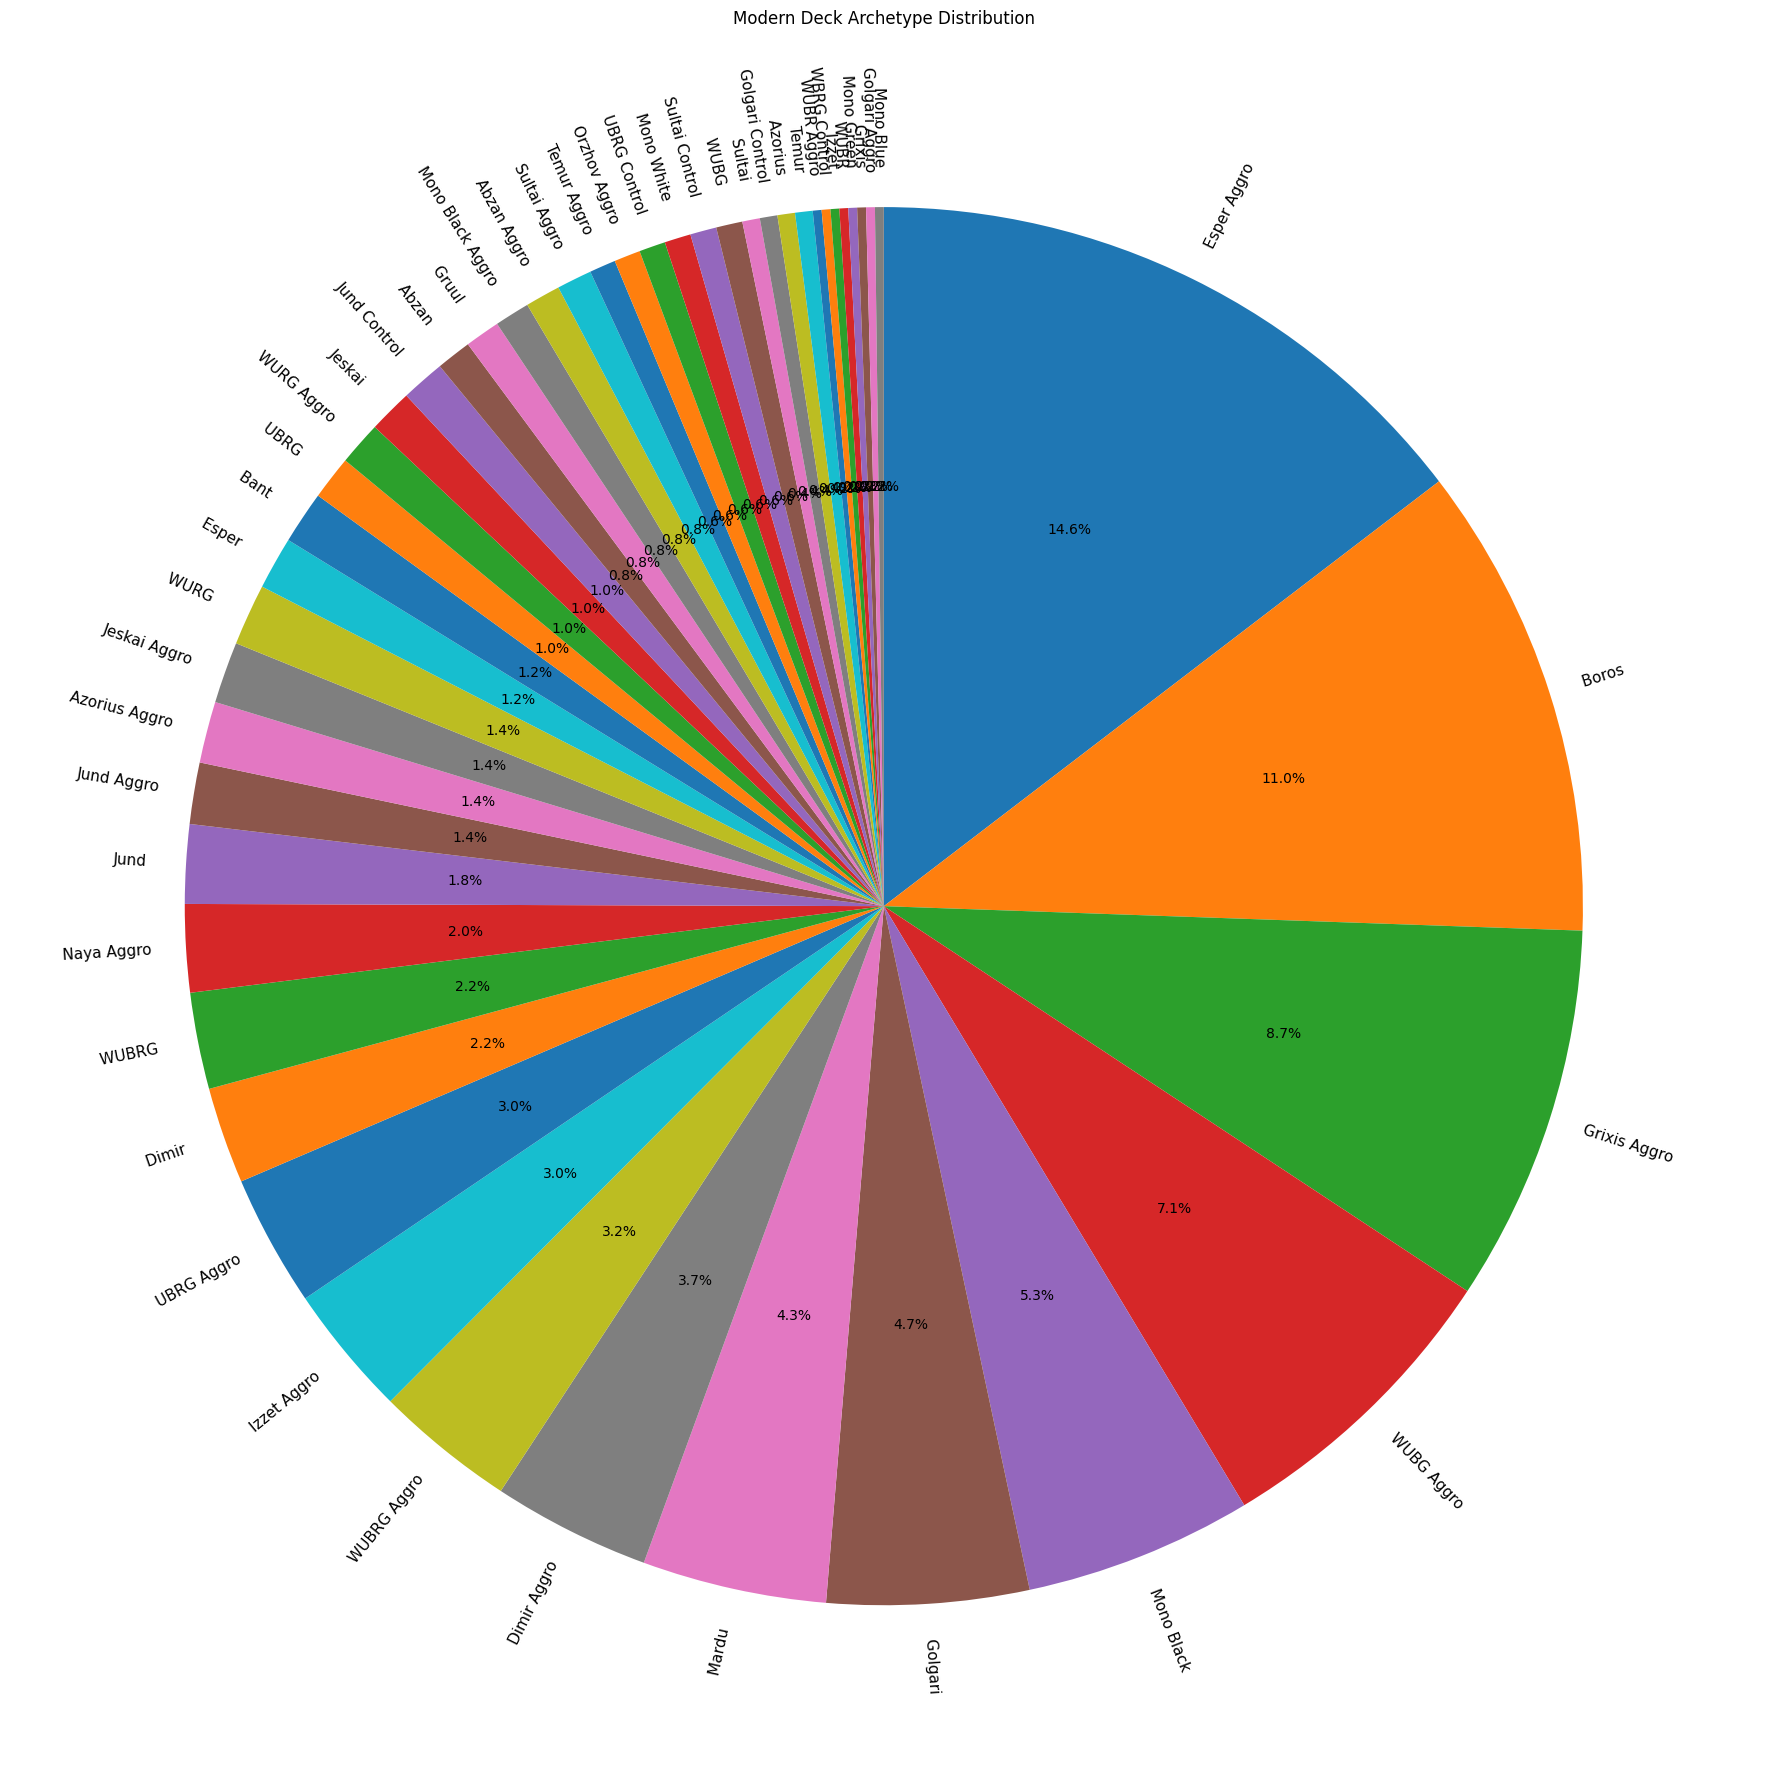

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

493 deck(s) without any of the specified key cards
Bant 


Main/Side  \
Deck URL                                         Deck               
/decklist/modern-challenge-32-2025-08-2612812733 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Side   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Side   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Side   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   

                                                                        Card Name  \
Deck URL                                         Deck                               
/decklist/modern-challenge-32-2025-08-2612812733 Deck 0                  Solitude   
                                                 Deck 0      Teferi, Time Raveler   
                                                 Deck 0         Consign to Memory   
                                                 Deck 0          Prismatic Ending   
                                                 Deck 0              Orim's Chant   
                                                 Deck 0   Narset, Parter of Veils   
                                                 Deck 0   Consult the Star Charts   
                                                 Deck 0               Spell Snare   
                                                 Deck 0                   Silence   
                                                 Deck 0             Day's Undoing   
                                                 Deck 0                  Reprieve   
                                                 Deck 0           Celestial Purge   
                                                 Deck 0        Wrath of the Skies   
                                                 Deck 0           Lórien Revealed   
                                                 Deck 0                  Subtlety   
                                                 Deck 0         Razorgrass Ambush   
                                                 Deck 0           Supreme Verdict   
                                                 Deck 0        Temporary Lockdown   
                                                 Deck 0         Force of Negation   
                                                 Deck 0  Kaheera, the Orphanguard   
                                                 Deck 0                 High Noon   
                                                 Deck 0          Mystical Dispute   
                                                 Deck 0             Rest in Peace   
                                                 Deck 0        Soul

In [4]:
includedCardList = []
excludedCardList = []
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Flooded Strand            1.31
Marsh Flats               1.18
Arid Mesa                 1.02
Polluted Delta            0.85
Solitude                  0.77
                          ... 
Dewdrop Cure              0.00
Halo Forager              0.00
World Map                 0.00
Abstergo Entertainment    0.00
Zagoth Triome             0.00
Name: Quantity, Length: 603, dtype: float64

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Flooded Strand            644
Marsh Flats               581
Arid Mesa                 504
Polluted Delta            418
Solitude                  382
                         ... 
Dewdrop Cure                1
Halo Forager                1
World Map                   1
Abstergo Entertainment      1
Zagoth Triome               1
Name: Quantity, Length: 603, dtype: int64